Plotting for subfolder: ang20191018t144405_r2674_c436_w151_h151


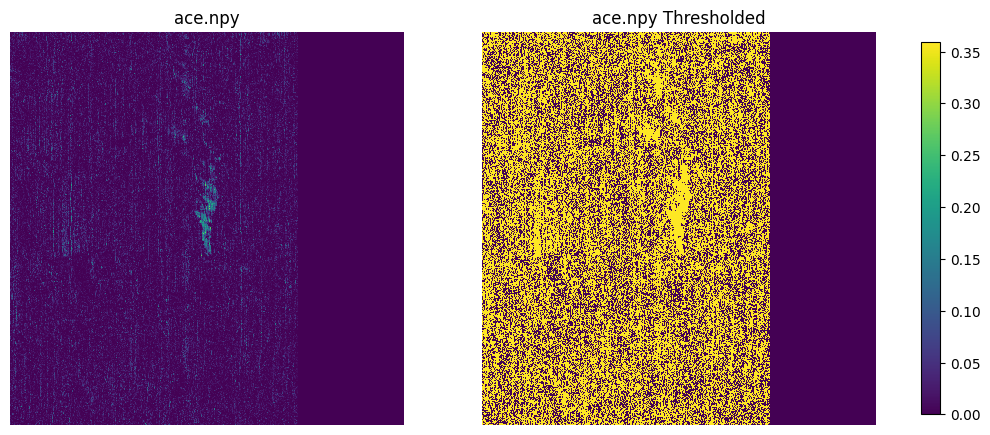

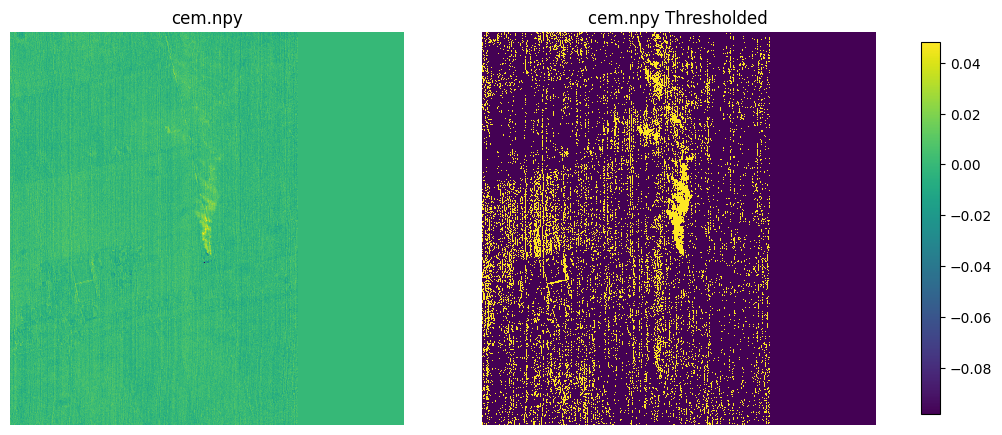

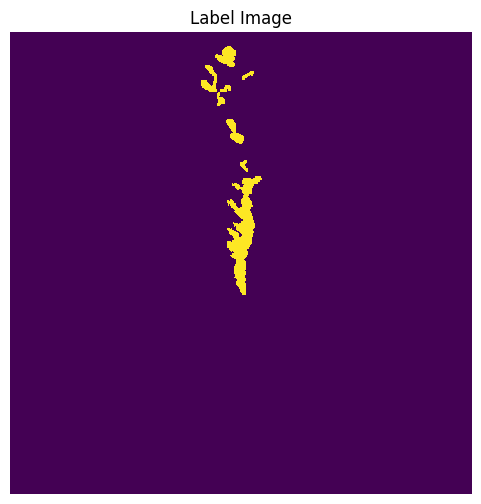

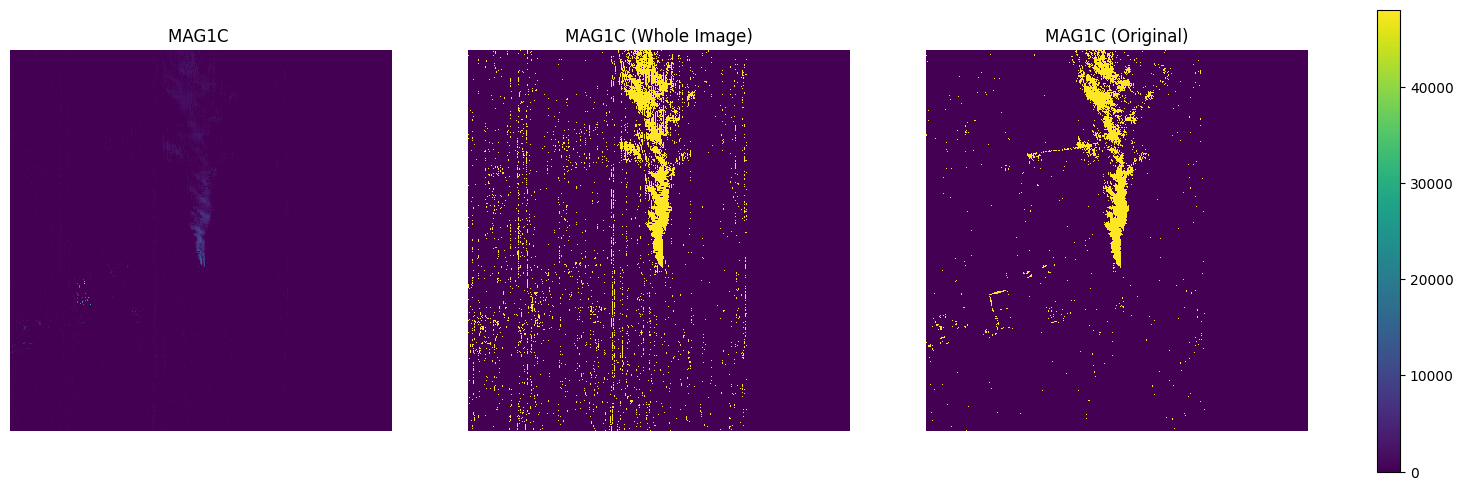

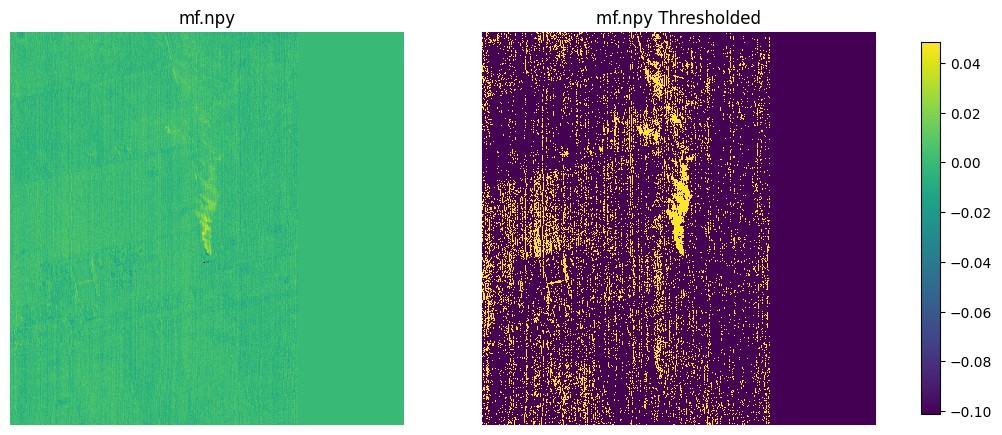

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Paths to folders
path_columns = "data/BY_COLUMNS_GENERATED-MAG1C"
whole_image = "data/WHOLE_IMAGE_GENERATED-MAG1C"
original = "data/WHOLE_IMAGE_STARCOP-MAG1C"

# Filenames to process
filenames = ["ace.npy", "cem.npy", "label.npy", "mag1c.npy", "mf.npy"]

# Get all subfolders in the column path
subfolders = [f for f in os.listdir(path_columns) if os.path.isdir(os.path.join(path_columns, f))]
#subfolders.sort()  # Ensure sorted order

# Select subfolder based on index_to_plot
index_to_plot = 330
if index_to_plot >= len(subfolders):
    raise ValueError(f"Index {index_to_plot} is out of range. Only {len(subfolders)} subfolders available.")

subfolder = subfolders[index_to_plot]
subfolder = "ang20191018t144405_r2674_c436_w151_h151"
print(f"Plotting for subfolder: {subfolder}")

# Loop through all specified filenames
for filename in filenames:
    file_column = os.path.join(path_columns, subfolder, filename)
    file_whole = os.path.join(whole_image, subfolder, filename)
    file_original = os.path.join(original, subfolder, filename)

    # Load data if file exists, otherwise set to None
    data_column = np.load(file_column) if os.path.exists(file_column) else None
    data_whole = np.load(file_whole) if os.path.exists(file_whole) else None
    data_original = np.load(file_original) if os.path.exists(file_original) else None

    # Plot based on the file type
    if filename in ["ace.npy", "cem.npy", "mf.npy"]:  # Two images (columns vs whole)
        if data_column is not None and data_whole is not None:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            axes[0].imshow(data_whole, cmap='viridis', interpolation='nearest')
            axes[0].set_title(f"{filename}")
            axes[1].imshow(data_whole > 0.004, cmap='viridis', interpolation='nearest')
            axes[1].set_title(f"{filename} Thresholded")
            for ax in axes:
                ax.axis("off")
            plt.colorbar(axes[0].images[0], ax=axes, fraction=0.02)
            plt.show()

    elif filename == "mag1c.npy":  # Three images (columns, whole, original)
        if data_column is not None and data_whole is not None and data_original is not None:
            fig, axes = plt.subplots(1, 3, figsize=(18, 6))
            axes[0].imshow(data_whole, cmap='viridis', interpolation='nearest')
            axes[0].set_title("MAG1C ")
            axes[1].imshow(data_whole > 500, cmap='viridis', interpolation='nearest')
            axes[1].set_title("MAG1C (Whole Image)")
            axes[2].imshow(data_original > 500, cmap='viridis', interpolation='nearest')
            axes[2].set_title("MAG1C (Original)")
            for ax in axes:
                ax.axis("off")
            plt.colorbar(axes[0].images[0], ax=axes, fraction=0.02)
            plt.show()

    elif filename == "label.npy":  # Single image (from any path)
        if data_column is not None:
            plt.figure(figsize=(6, 6))
            plt.imshow(data_column, cmap='viridis', interpolation='nearest')
            plt.title("Label Image")
            plt.axis("off")
            plt.show()

In [ ]:
spectrum = np.load("spectrum.npy")
centers = np.load("centers.npy")
print(spectrum)
print(centers)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9999.0..32.291378].


-9999.0 37.493042


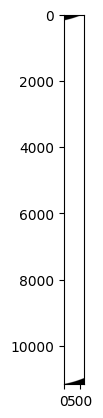

In [2]:
import spectral
import matplotlib.pyplot as plt
path = "ang20191021t171902_rdn_v2x1/ang20191021t171902_rdn_v2x1_img"

rdn_file = spectral.io.envi.open(path + ".hdr", path)
rdn_file_npy = rdn_file.load()
print(rdn_file_npy.min(), rdn_file_npy.max())
plt.imshow(rdn_file_npy[:,:,[30,20,10]])

0.0 5.2797136


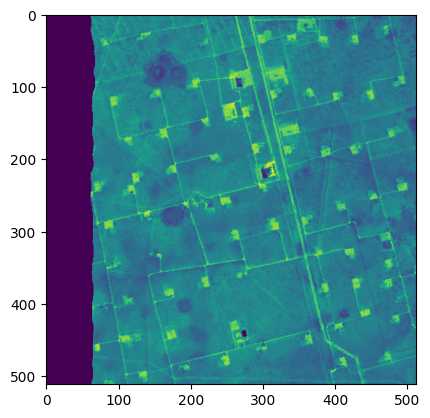

In [4]:
import tifffile as tiff
import matplotlib.pyplot as plt

file = tiff.imread("/home/jherec/starcop_big/STARCOP_allbands/ang20191025t171141_r10528_c126_w151_h151/TOA_AVIRIS_2194nm.tif")
print(file.min(), file.max())
plt.imshow(file)

In [16]:
import spectral.io.envi as envi
import numpy as np
file = envi.open("ang20191021t171902_rdn_v2x1/ang20191021t171902_rdn_v2x1_img.hdr", "ang20191021t171902_rdn_v2x1/ang20191021t171902_rdn_v2x1_img")
print(file.metadata)
wavelength = file.metadata["wavelength"]
fwhm = file.metadata["fwhm"]
wavelength = [float(f) for f in wavelength]
fwhm = [float(f) for f in fwhm]
print(wavelength)
print(fwhm)

{'description': 'AVIRIS-NG Measured Radiances in uW nm-1 cm-2 sr-1', 'samples': '616', 'lines': '11164', 'bands': '425', 'header offset': '0', 'file type': 'ENVI', 'data type': '4', 'interleave': 'bil', 'byte order': '0', 'map info': ['UTM', '1', '1', '688980.631507', '3588742.29041', '7.3', '7.3', '13', 'North', 'WGS-84', 'units=Meters', 'rotation=-55.0000000'], 'crosstrack scatter file': '/home/winstono/isat-dev/ang/cal/data/20170125_via_ang20160925t182412_crf', 'wavelength units': 'Nanometers', 'flat field file': '/home/winstono/isat-dev/ang/cal/data/20180727_ang20180628_BLUSS_avg_rows300-340_ff', 'wavelength file': '/home/winstono/isat-dev/ang/cal/data/20190111_ang20180325t061759_wavelength_fit_full.txt', 'wavelength': ['376.719576', '381.729576', '386.739576', '391.749576', '396.749576', '401.759576', '406.76957600000003', '411.77957599999996', '416.789576', '421.799576', '426.80957600000005', '431.819576', '436.819576', '441.829576', '446.839576', '451.84957599999996', '456.85957

In [6]:
import numpy as np
spectrum = np.load("aviris_mag1c_spectrum.npy")
centres = np.load("aviris_mag1c_centers.npy")
for x,y in zip(spectrum, centres):
    print(x,y)

0.0 376.719576
0.0 381.729576
0.0 386.739576
0.0 391.749576
0.0 396.749576
0.0 401.759576
0.0 406.76957600000003
0.0 411.77957599999996
0.0 416.789576
0.0 421.799576
0.0 426.80957600000005
0.0 431.819576
0.0 436.819576
0.0 441.829576
0.0 446.839576
0.0 451.84957599999996
0.0 456.859576
0.0 461.869576
0.0 466.87957600000004
0.0 471.87957600000004
0.0 476.889576
0.0 481.899576
0.0 486.909576
0.0 491.919576
0.0 496.929576
0.0 501.93957600000005
0.0 506.94957600000004
0.0 511.94957600000004
0.0 516.959576
0.0 521.9695760000001
0.0 526.979576
0.0 531.9895759999999
0.0 536.999576
0.0 542.009576
0.0 547.009576
0.0 552.0195759999999
0.0 557.029576
0.0 562.039576
0.0 567.049576
0.0 572.059576
0.0 577.069576
0.0 582.0795760000001
0.0 587.0795760000001
0.0 592.089576
0.0 597.099576
0.0 602.1095760000001
0.0 607.1195759999999
0.0 612.1295759999999
0.0 617.139576
0.0 622.139576
0.0 627.149576
0.0 632.1595759999999
0.0 637.169576
0.0 642.179576
0.0 647.189576
0.0 652.199576
0.0 657.209576
0.0 662.20

Plotting for subfolder: ang20191018t183859_r12712_c110_w151_h151


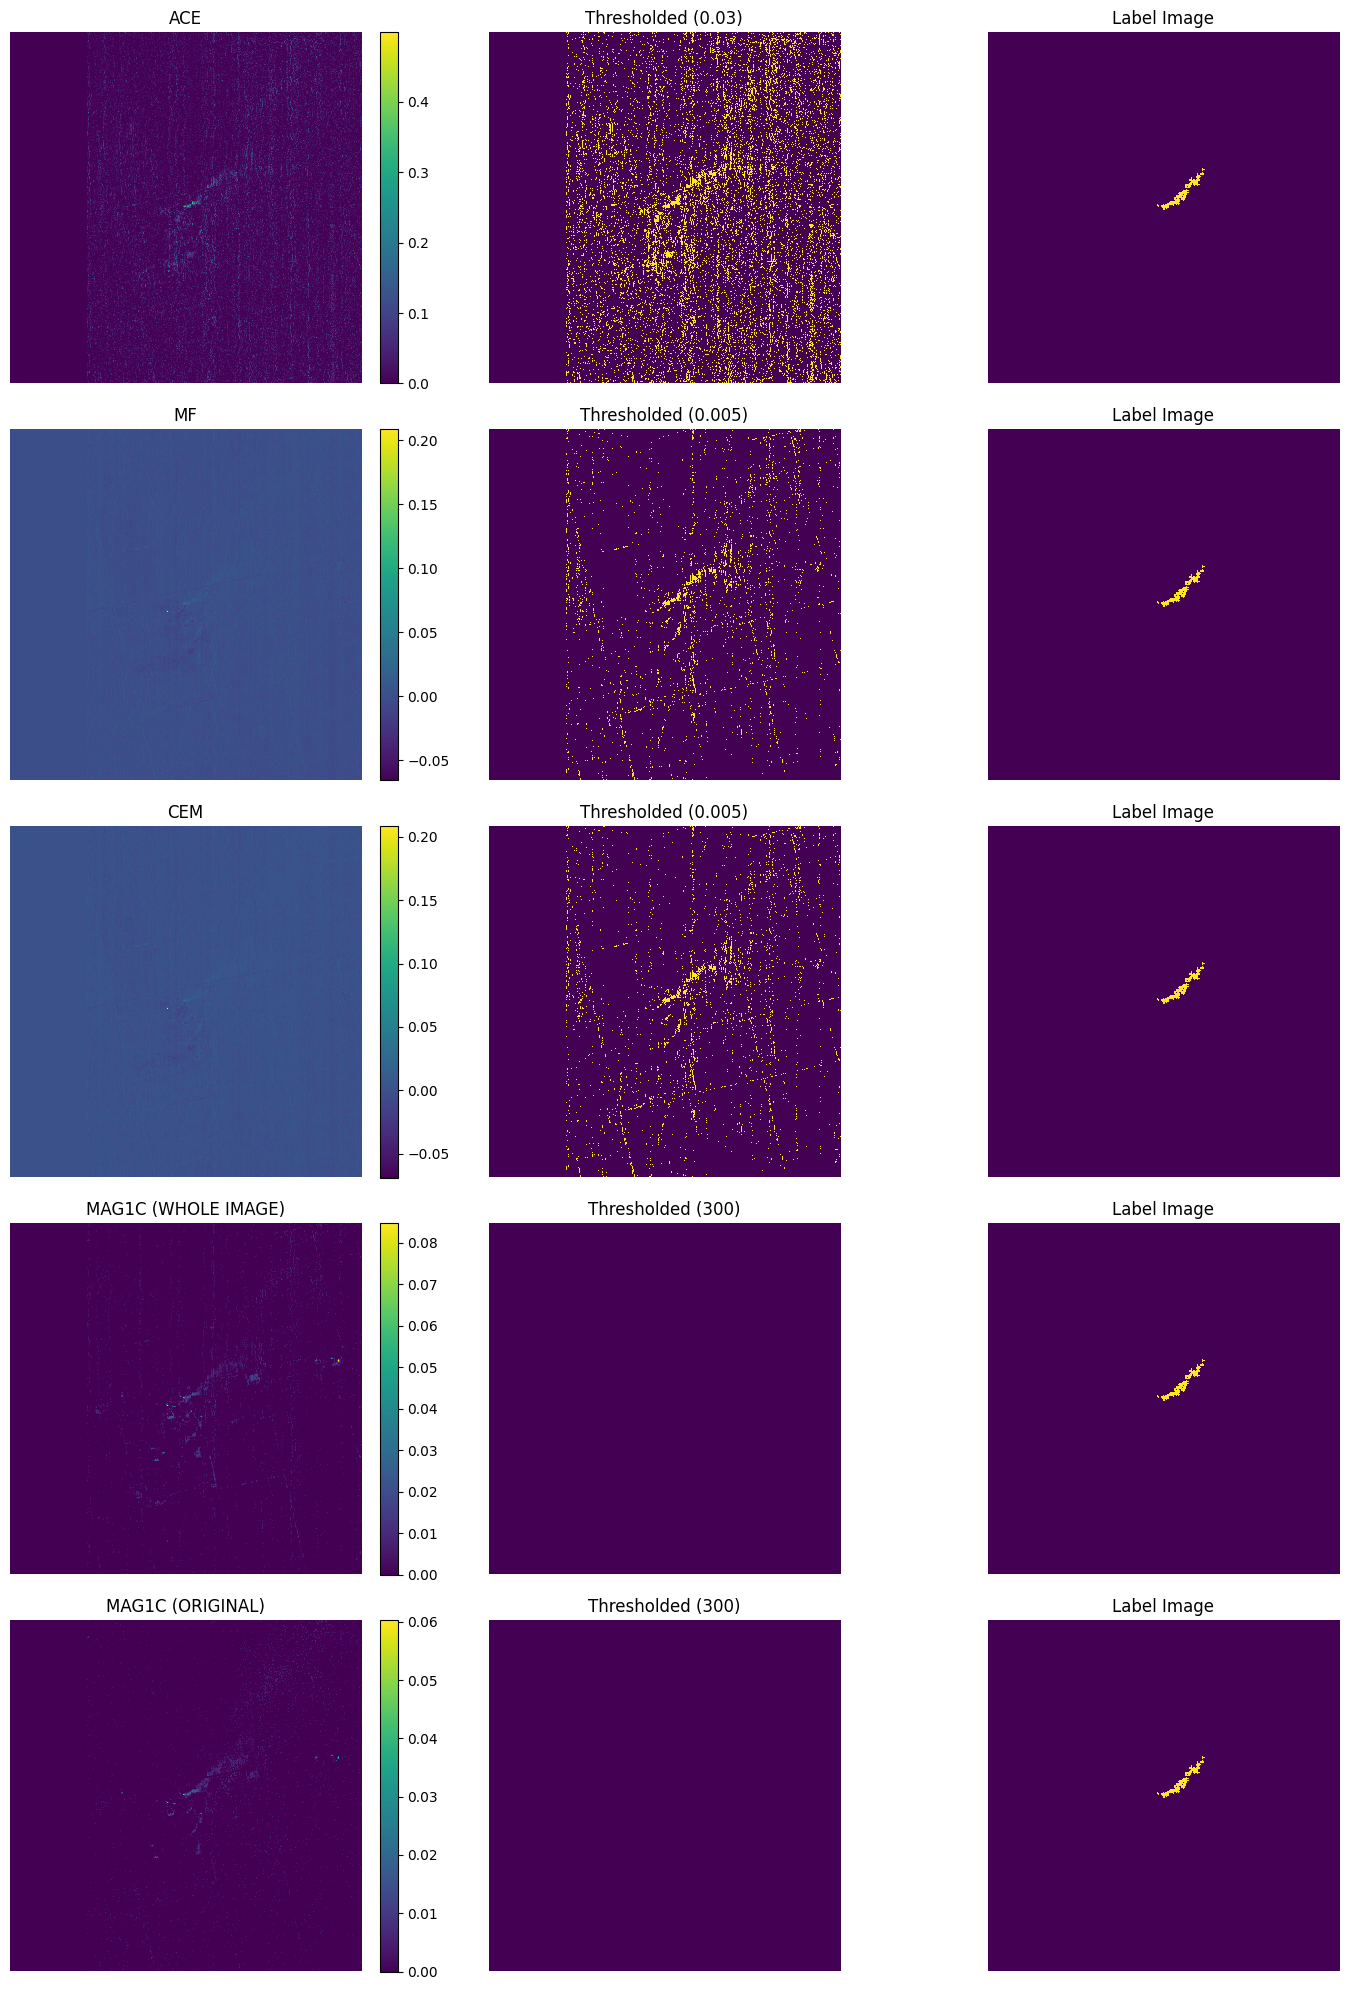

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Paths to folders
whole_image = "data/WHOLE_IMAGE_GENERATED-MAG1C"
original = "data/WHOLE_IMAGE_STARCOP-MAG1C"

# Filenames to process
filenames = ["ace.npy", "mf.npy", "cem.npy", "mag1c.npy", "mag1c.npy"]  # Last one from original

# Thresholds for each product (empirically chosen)
thresholds = {
    "ace.npy": 0.03,
    "mf.npy": 0.005,
    "cem.npy": 0.005,
    "mag1c.npy": 300,
}

# Get all subfolders in the whole image path
subfolders = [f for f in os.listdir(whole_image) if os.path.isdir(os.path.join(whole_image, f))]

# Select subfolder based on index_to_plot
index_to_plot =100
if index_to_plot >= len(subfolders):
    raise ValueError(f"Index {index_to_plot} is out of range. Only {len(subfolders)} subfolders available.")

subfolder = subfolders[index_to_plot]
print(f"Plotting for subfolder: {subfolder}")

# Create figure with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Loop through all specified filenames
for row_idx, filename in enumerate(filenames):
    # Determine file paths
    if row_idx == 4:  # Last mag1c.npy from original folder
        file_whole = os.path.join(original, subfolder, filename)
    else:
        file_whole = os.path.join(whole_image, subfolder, filename)
    
    file_label = os.path.join(whole_image, subfolder, "label.npy")  # Label remains the same

    # Load data
    data_whole = np.load(file_whole) if os.path.exists(file_whole) else None
    data_label = np.load(file_label) if os.path.exists(file_label) else None

    # Plot Whole Image
    if data_whole is not None:
        title = filename.replace(".npy", "").upper()
        if row_idx == 3:
            title = "MAG1C (WHOLE IMAGE)"
            data_whole /= 1e5
        if row_idx == 4:
            title = "MAG1C (ORIGINAL)"
            data_whole /= 1e5
        
        im = axes[row_idx, 0].imshow(data_whole, cmap='viridis', interpolation='nearest')
        axes[row_idx, 0].set_title(title)
        fig.colorbar(im, ax=axes[row_idx, 0], fraction=0.046, pad=0.04)  # Add colorbar

    # Plot Thresholded Image
    if data_whole is not None and filename in thresholds:
        axes[row_idx, 1].imshow(data_whole > thresholds[filename], cmap='viridis', interpolation='nearest')
        axes[row_idx, 1].set_title(f"Thresholded ({thresholds[filename]})")

    # Plot Label Image
    if data_label is not None:
        axes[row_idx, 2].imshow(data_label, cmap='viridis', interpolation='nearest')
        axes[row_idx, 2].set_title("Label Image")

    # Remove axes ticks
    for col in range(3):
        axes[row_idx, col].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()
